In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(21,)
(21, 1)


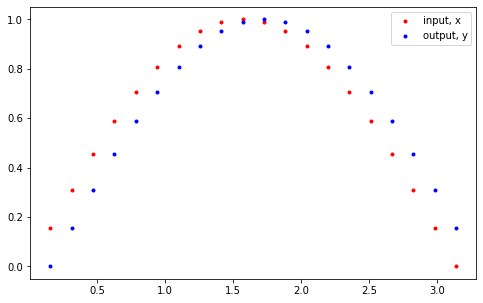

In [2]:
plt.figure(figsize=(8,5))

seq_length = 20

time_steps = np.linspace(0, np.pi, seq_length+1)
data = np.sin(time_steps)

print(data.shape)

data.resize((seq_length+1, 1))

print(data.shape)

x = data[1:]
y = data[:-1]

plt.plot(time_steps[1:], x, 'r.', label = "input, x")
plt.plot(time_steps[1:], y, 'b.', label = "output, y")

plt.legend(loc = "best")
plt.show()

In [7]:
class RNN(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, n_layers):
    super(RNN, self).__init__()

    self.hidden_dim = hidden_dim

    self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first = True)

    self.fc = nn.Linear(hidden_dim, output_size)
  
  def forward(self, x, hidden):
    batch_size = x.size(0)

    r_out, hidden = self.rnn(x, hidden)

    r_out = r_out.view(-1, self.hidden_dim)

    output = self.fc(r_out)

    return output, hidden

In [9]:
test_rnn = RNN(1, 1, 10, 2)

time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length+1, 1))

test_input = torch.Tensor(data).unsqueeze(0)
print("Input_size => ", test_input.size())

output, hidden = test_rnn(test_input, None)

print('Output size: ', output.size())
print('Hidden state size: ', hidden.size())

Input_size =>  torch.Size([1, 21, 1])
Output size:  torch.Size([21, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [10]:
input_size = 1
hidden_dim = 32
output_size = 1
n_layers = 1

rnn = RNN(input_size, output_size, hidden_dim, n_layers)

print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [11]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr = 0.01)

In [14]:
def train(rnn, n_steps, for_every):
  hidden = None
  for ii, step in enumerate(range(n_steps)):
    time_steps = np.linspace(step*np.pi, (step+1)*np.pi, seq_length+1)
    data = np.sin(time_steps)
    data.resize((seq_length+1, 1))

    x = data[:-1]
    y = data[1:]

    x_tensor = torch.Tensor(x).unsqueeze(0)
    y_tensor = torch.Tensor(y)

    predictions, hidden = rnn(x_tensor, hidden)

    hidden = hidden.data

    optimizer.zero_grad()
    loss = criterion(predictions, y_tensor)
    loss.backward()
    optimizer.step()

    if ii%for_every == 0:
      print("loss ", loss.item())
      plt.plot(time_steps[1:], x, 'r.', label="inputs")
      plt.plot(time_steps[1:], predictions.data.numpy().flatten(), 'b.', label = "predictions")
      plt.legend()
      plt.show()
  
  return rnn

loss  0.3908778429031372


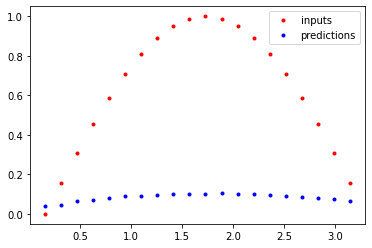

loss  0.02847912535071373


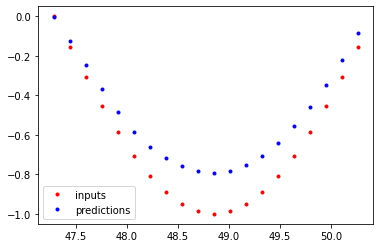

loss  0.004950086586177349


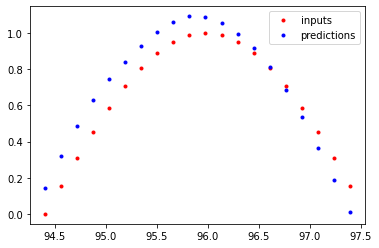

loss  0.0009383365395478904


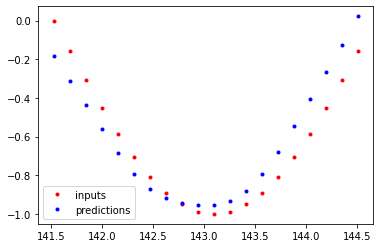

loss  0.0001508506538812071


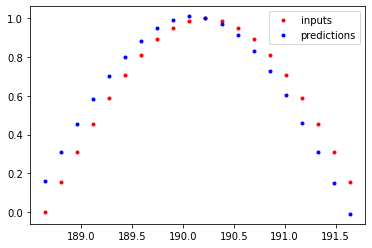

In [15]:
n_steps = 75
for_every = 15
rnn = train(rnn, n_steps, for_every)